<a href="https://colab.research.google.com/github/kumarjitpathakbangalore/Data-Science-from-Scratch/blob/master/Transaction_data_preparation_EDA_ABT_creation_final_KP_JK_VV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A journey from POS data to usable features for any classification modelling 

## What are we going to cover here?

Note: This is a long coding excercise. Please have patinece to go till the end. In case if you don't have 30min time on hand, please wait for a peaceful time to gothrough the same.


Hello readers, It's been some time since  posted my last bolg on neural network. 

After spending 14 years on the field of data science(predictive modelling. I realized that many of the **budding data scienitst** have great difficulty in understanding data before applying any machine learning techniques or mathing the coding skills of a core programmer. 

We intend to build this **notebook with step by step execution** so that a budding data scientist can cee and feel what is happening in each step of the program before executing the same at the same time realize the vaue of understanding the data in detail.

This notebook is for budding data scientists not for the expert programmers. 

This notebook is a joint effort of **three partners colaboration (Jitin Kapila, Vinoth Venkatraman, and myself- Kumarjit Pathak)**. Without both of them coming togeather it may not have been possible to achieve this during COVID crisis period where we all are trying to save our job amidst great uncertainity.


However there is a bigger responsibility of sharing while learning and hence continuing our effort. Hope you like it.

**PS: Our contact details are at the end of the content. Please scroldown to the last to find it.**

We are going to use google colab for this excercise. Whoever wants to know more about how to use google colab you can follow the below link:

https://medium.com/@kumarjitpathak/how-to-use-colab-for-data-science-experimentation-6859553c82da


### We want to cover the following in this notebook


> ## Data Understanding using transactional data

*   **Understanding data issues**
*   **Understanding date operation**
*   **Dynamic subsetting of data** 
*   **Using if statement, for loop, list comprehension in a dataframe for analysis**
*   **Data cleaning based on multiple condition**
*   **Recoding of values in a dataframe based on condition** 
*   etc....



> ## Exploratory data analysis


*   **Univariate Study of variables**
*   **Feature extraction from different variable**
*   **Cross-tabulation**


> ## Building ABT(Analytical Base Table)


*   **Aggregating data at different level to build ABT**
*   **How to dynamically recode column names using raval**







**We shall cover the modelling part of it in our upcoming blogs: stay tuned**















In [0]:
# If you want to directly fetch any data from kaggle you need to download kaggle.jason once yu login in kaggle. 
#This will help colab to connec to the required dataset based on your own authentication


from google.colab import files
files.upload()

# it would prompt for a jason file upload. Please go to your computer and select the kaggle Jason and it would autometically upload.



In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Apr 12 08:50 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

### Now we have successfuly setup the kaggle API . It's time to data download directly from kaggle

In [5]:
!kaggle datasets download -d carrie1/ecommerce-data

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 65.9MB/s]


### Do we know where is the file currently located?

In [0]:
!ls /content/

ecommerce-data.zip  kaggle.json  sample_data


### Data above in zip format, We might need to unzip the same.



In [6]:
!sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [7]:
!unzip ecommerce-data.zip

Archive:  ecommerce-data.zip
  inflating: data.csv                


### Before going ahead and loading this file using pandas. Let's do litte check of our environment. These are codes just good to know not essential

In [0]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [0]:
# Check GPU specification
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11879623607362747225, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7308560481223555769
 physical_device_desc: "device: XLA_CPU device"]

### Let's now start working on the data and load the same in pandas. 

In [0]:
import pandas as pd
import numpy as np

In [0]:
ecomdata= pd.read_csv('data.csv', delimiter = ',',encoding= 'unicode_escape')

In [0]:
ecomdata.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


#### Let's see what is the current data types and details of the file loaded

In [0]:
ecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
ecomdata.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Checking some priliminary matters:

*   Shape of the files , Understand the size of the file dimention
*   Basic descriptive , is there any extreme value?
*   Is there any missing value?



In [0]:
ecomdata.shape

(541909, 8)

In [0]:
ecomdata.describe() # basic descriptive statistics fr the comumns in neumeric

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
ecomdata.isnull().sum() # Count of nulls by each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Our observation above:


*   Date is currently in Object format and hence the operation might be difficult
*   There are extreme values both on positive side and negative side
*   There are missing values in Description and Customer ID columns 
*   Columns has capital and small letter as well - sometimes inconvenient for programming 

Note: Description can be filled based on Unique stock code vs description lookup, but customer ID is a basic beed of the data and hence it is better to drop the data lines which has NULL customer IDs



### Now you must be thinking that we shall remove outliers?

No , not so soon. We need to understad outlier before we take decision of removing them. We shall do it in due course of time before we create **ABT**     (**Analytical Base Table**- This data goes into machine learning model witout any further transformation)

### Let's first do date operation

In [0]:
# Let's start with Date operations. Let's see what are the options it provides
help(pd.datetime)

Help on class __DatetimeSub in module pandas:

class __DatetimeSub(builtins.object)
 |  Methods defined here:
 |  
 |  emit_warning(dummy=0)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(cls, *args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



/usr/lib/python3.6/inspect.py:441: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  srch_obj = srch_cls.__getattr__(cls, name)
/usr/lib/python3.6/pydoc.py:220: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  fields = getattr(object, '_fields', [])


In [0]:
# Date Operation- Converting the Invoice date to DATE

ecomdata["InvoiceDate"]= pd.to_datetime(ecomdata.InvoiceDate)

In [0]:
ecomdata.dtypes # Checking whether the type has 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

after coverting date time we can explore all the options to extract all info using below code +TAB

CODE:
ecomdata.InvoiceDate.dt.

### Let's Do Date operation in a different way, Using lambda function. This will help us to learn and apply in many other occisions 

In [0]:
ecomdata[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
# Another way to do it: Using lambda function and splitting the string based on space 
ecomdata[:5].InvoiceDate.apply(lambda X: X.split())

0    [12/1/2010, 8:26]
1    [12/1/2010, 8:26]
2    [12/1/2010, 8:26]
3    [12/1/2010, 8:26]
4    [12/1/2010, 8:26]
Name: InvoiceDate, dtype: object

In [0]:
# Can we select only the first part of the string split
ecomdata[:5].InvoiceDate.apply(lambda X: X.split()[0])

0    12/1/2010
1    12/1/2010
2    12/1/2010
3    12/1/2010
4    12/1/2010
Name: InvoiceDate, dtype: object

In [0]:
# Let's now apply this on the complete ecom data for Invoice Date column
ecomdata["newdate"] = ecomdata.InvoiceDate.apply(lambda X: X.split()[0])

In [0]:
ecomdata.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newdate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010


In [0]:
# now converting the "newdate" to date time type

ecomdata["newdate"]= pd.to_datetime(ecomdata.newdate)

In [0]:
# Shrinking the date time feaure to only date 

ecomdata[:10].newdate.dt.date

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
5    2010-12-01
6    2010-12-01
7    2010-12-01
8    2010-12-01
9    2010-12-01
Name: newdate, dtype: object

### Let's now remove Nulls

In [0]:
# finding the data subset which has NaN in Description
ecomdata[ecomdata.description.isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,2010-12-01
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,2010-12-01
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,2010-12-01
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,2010-12-01
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom,2011-12-07
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom,2011-12-07
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom,2011-12-07
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom,2011-12-08


In [0]:
# let's remove nulls in customer id which are null
ecomnew= ecomdata[~ecomdata.CustomerID.isnull()].copy() 


In the above operation we have used an additional function ".copy()" . This helps to create complete dataframe from ecom data. 

If we don't use this then after creating the new data file in case if we decide to chage the old file data it woud impact the new data file as well. The reason being python applies all functions as mask on the data. by giving .copy command we are actually asking us to execute thr command and create the dataframe now instead of creating mask.

In [13]:
ecomnew.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
newdate        0
dtype: int64

### Let's change all the column header to lower case

In [14]:
ecomnew.columns # this output a list , hence to change this, we ned to do list comprehension

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'newdate'],
      dtype='object')

In [15]:
# For ease of operation we can put all the columns names in to lower case
[i.lower() for i in ecomnew.columns]

['invoiceno',
 'stockcode',
 'description',
 'quantity',
 'invoicedate',
 'unitprice',
 'customerid',
 'country',
 'newdate']

In [0]:
ecomnew.columns = [i.lower() for i in ecomnew.columns]

In [18]:
ecomnew.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01


## Let's do some exploration of the data before doing any operation on this. 

Data is the most importnat thing. You dont's understand data, you can not apply right science. In my experience in this filed for last 14 years , data has managed to surprise me every time with new variations and unknowen patterns.

I want to share the same with all the budding data scientist. Understand your data like your girlfriend and you will know how she will react to any situation or science.

Turst me on this there is no better match than a near-perfet understanding.



        I shall try to give some glimps of the data exploration(it's never enough though )
        Where ever you have doubt , please extract the data and put it in simple excel and understand deeper.

## Let's Play now: 

In [19]:
# Data frame consist of Row and columns and both the index starts from 0 . So DF[0,0] gives you the first row and first column value.

ecomnew.iloc[:,1] # extracting 2nd column data for all rows from the data frame

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stockcode, Length: 406829, dtype: object

In [20]:
ecomnew.iloc[1] # we are just extracting the 2nd row of the data

invoiceno                   536365
stockcode                    71053
description    WHITE METAL LANTERN
quantity                         6
invoicedate         12/1/2010 8:26
unitprice                     3.39
customerid                   17850
country             United Kingdom
newdate        2010-12-01 00:00:00
Name: 1, dtype: object

In [21]:
ecomnew.iloc[10,0] # 10th row first column 

'536367'

In [23]:
# Let's now see the distribution of the data , In pandas we can jut get the descriptive stats for only numeric features unlike R which gives for everything
# .T stands for transpose the output
ecomnew.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
unitprice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
customerid,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [24]:
# Checking where cutomers arre doing transaction more than 1000 units

print(ecomnew[ecomnew.quantity > 1000].head(6))

      invoiceno stockcode  ...         country    newdate
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...            EIRE 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07

[6 rows x 9 columns]


In [25]:
# Understanding the frequency count of the countries 
ecomnew.country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

###   What do we see on this ?

      UK has the most transaction then there are europian countries and Middleeastern countries. 
      If you observe you will see distribution is really low starting from **Italy**  to **Saudi Arabia**

      You might want to group them in to some larger buckets do that the distribution is prominant

**To access any part of the data in data frame we should use** 


*   .loc----- location based search based on column key
*   .iloc---- Index location based search for each row operation 



## There anre multiple ways to do this :

Using list operations where we create a list of countries belonging to a region and then iteratively search in the database to replace the same:
This is most useful way 

Another ways is to use pandas dataframe selector and change the values to region for each country seperately

In [0]:
middleeast=['Saudi Arabia','Bahrain','United Arab Emirates','Greece'] # We might try to do this using list operation

In [0]:
europe= ['Germany','Italy','Gerogia','Denmark','United Kingdom','UK']

In [29]:
ecomnew.loc[ecomnew.country=='Saudi Arabia'][["country", 'customerid']]

,country,customerid
100810,Saudi Arabia,12565.0
100811,Saudi Arabia,12565.0
100812,Saudi Arabia,12565.0
100813,Saudi Arabia,12565.0
100814,Saudi Arabia,12565.0
100815,Saudi Arabia,12565.0
100816,Saudi Arabia,12565.0
100817,Saudi Arabia,12565.0
100818,Saudi Arabia,12565.0
108127,Saudi Arabia,12565.0


In [0]:
# Trying to use the aplly approach for thr getting
ecomnew['country_group'] = ecomnew['country'].apply(lambda x: 'MiddleEast' if x in middleeast else x)
ecomnew['country_group'] = ecomnew['country_group'].apply(lambda x: 'Europe' if x in europe else x)

### Few ways to change values in a dataframe  (hard coded):



       Option-1 Using Index Location
        SYNTAX:
        df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
        EXAMPLE:
        df.loc[df['age']==3, ['age-group']] = 'toddler'
        
        Option-2 Using pd.replace() function
        SYNTAX:
        DataFrame.replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
        EXAMPLE:
        ecomdata.country.replace(to_replace="Bahrain", value="Middle East1", inplace=True)

        Option-3 Using np.where
        SYNTAX:
        df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)

        Option-4 Using Mask
        ecomdata['country'].mask(ecomdata['country'] == 'Value to replace', 'value to replace with', inplace=True)



In [0]:
ecomnew.loc[ecomnew.country=="Saudi Arabia",['country']]="Middle East"

In [0]:
ecomdata.loc[ecomdata.country=='Middle East']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2/24/2011 10:34,0.42,12565.0,Middle East
100811,544838,22363,GLASS JAR MARMALADE,6,2/24/2011 10:34,2.95,12565.0,Middle East
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2/24/2011 10:34,2.95,12565.0,Middle East
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2/24/2011 10:34,2.95,12565.0,Middle East
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2/24/2011 10:34,1.65,12565.0,Middle East
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2/24/2011 10:34,1.65,12565.0,Middle East
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2/24/2011 10:34,1.65,12565.0,Middle East
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2/24/2011 10:34,5.49,12565.0,Middle East
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2/24/2011 10:34,1.45,12565.0,Middle East
108127,C545507,22361,GLASS JAR DAISY FRESH COTTON WOOL,-5,3/3/2011 11:43,2.95,12565.0,Middle East


In [32]:
ecomnew[ecomnew.country=="Bahrain"].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
181140,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,5/9/2011 13:49,1.25,12355.0,Bahrain,2011-05-09
181141,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96,5/9/2011 13:49,1.25,12355.0,Bahrain,2011-05-09
181142,552449,23077,DOUGHNUT LIP GLOSS,60,5/9/2011 13:49,1.25,12355.0,Bahrain,2011-05-09
181143,552449,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,2,5/9/2011 13:49,9.95,12355.0,Bahrain,2011-05-09
181144,552449,22649,STRAWBERRY FAIRY CAKE TEAPOT,8,5/9/2011 13:49,4.95,12355.0,Bahrain,2011-05-09


In [34]:
ecomnew[ecomnew.country=="Bahrain"].head().country.replace(to_replace="Bahrain", value="Middle East1")

181140    Middle East1
181141    Middle East1
181142    Middle East1
181143    Middle East1
181144    Middle East1
Name: country, dtype: object

In [0]:
# We are chaging th county names and grouping them togeather based on option 1 (most useful as you can put condition as well)
ecomnew.loc[ecomnew.country=="Germany",['country']]="Europe"
ecomnew.loc[ecomnew.country=="France",['country']]="Europe"
ecomnew.loc[ecomnew.country=="EIRE",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Spain",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Netherlands",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Belgium",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Switzerland",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Portugal",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Norway",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Italy",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Channel Islands",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Finland",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Cyprus",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Sweden",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Austria",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Denmark",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Japan",['country']]="Asia"
ecomnew.loc[ecomnew.country=="Poland",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Israel",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Hong Kong",['country']]="Asia"
ecomnew.loc[ecomnew.country=="Singapore",['country']]="Asia"
ecomnew.loc[ecomnew.country=="Iceland",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Greece",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Malta",['country']]="Europe"
ecomnew.loc[ecomnew.country=="United Arab Emirates",['country']]="Middle East"
ecomnew.loc[ecomnew.country=="European Community",['country']]="Europe"
ecomnew.loc[ecomnew.country=="RSA",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Lebanon",['country']]="Middle East"
ecomnew.loc[ecomnew.country=="Lithuania",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Brazil",['country']]="South America"
ecomnew.loc[ecomnew.country=="Czech Republic",['country']]="Europe"
ecomnew.loc[ecomnew.country=="Bahrain",['country']]="Middle East"
ecomnew.loc[ecomnew.country=="Saudi Arabia",['country']]="Middle East"

In [36]:
ecomnew.country.value_counts() # We have successfuly changed the same

United Kingdom    361878
Europe             42247
Australia           1259
Asia                 587
USA                  291
Unspecified          244
Canada               151
Middle East          140
South America         32
Name: country, dtype: int64

#### Time to look at some values and slice selection of  dataframe

More you do this it will give you the feel of the data

In [37]:
# Checking where cutomers arre doing transaction more than 1000 units

print(ecomnew[ecomnew.quantity > 1000].head(6))

      invoiceno stockcode  ...         country    newdate
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...          Europe 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07

[6 rows x 9 columns]


In [38]:
# AND operation in the dataframe "&"
print(ecomnew[(ecomnew.unitprice > 3) & (ecomnew.quantity > 1000)].head(10))

       invoiceno stockcode  ...         country    newdate
52132     540689    85123A  ...  United Kingdom 2011-01-11
52134     540689     22470  ...  United Kingdom 2011-01-11
348325    567423     23243  ...  United Kingdom 2011-09-20

[3 rows x 9 columns]


In [39]:
# OR operation in dataframe "|"


print(ecomnew[(ecomnew.quantity >1000) | (ecomnew.quantity< -1000)].head(10))

      invoiceno stockcode  ...         country    newdate
4287    C536757     84347  ...  United Kingdom 2010-12-02
4850     536809     84950  ...  United Kingdom 2010-12-02
4945     536830     84077  ...  United Kingdom 2010-12-02
4946     536830     21915  ...  United Kingdom 2010-12-02
6365     536890    17084R  ...          Europe 2010-12-03
16435    537659     22189  ...  United Kingdom 2010-12-07
16436    537659     22188  ...  United Kingdom 2010-12-07
19871    537899     22328  ...            Asia 2010-12-09
19980    537981     22492  ...  United Kingdom 2010-12-09
25920    538420     17096  ...  United Kingdom 2010-12-12

[10 rows x 9 columns]


In [40]:
### Little better looking one? See below
ecomnew[(ecomnew.quantity >1000) | (ecomnew.quantity< -1000)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom,2010-12-02
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,2010-12-02
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom,2010-12-02
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,Europe,2010-12-03
...,...,...,...,...,...,...,...,...,...
534952,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/2011 15:16,1.79,14646.0,Europe,2011-12-07
540070,581458,22197,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,United Kingdom,2011-12-08
540071,581459,22197,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,United Kingdom,2011-12-08
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09


### Selecting based on values in a series. 
# is.in function

     SYNTAX:
     DF[DF['column1'].isin(['492807', '567183']) & DF['column2'].isin(['21813', '22659'])]



In [41]:
ecomnew.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate'],
      dtype='object')

In [42]:
# New way t0 search for any values in a series and selecting based on th

ecomnew[ecomnew['invoiceno'].isin(['492807', '567183']) & ecomnew['stockcode'].isin(['21813', '22659'])]



,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
346033,567183,22659,LUNCH BOX I LOVE LONDON,2,9/18/2011 15:32,1.95,14769.0,United Kingdom,2011-09-18
346281,567183,22659,LUNCH BOX I LOVE LONDON,2,9/18/2011 15:33,1.95,14769.0,United Kingdom,2011-09-18


#### One problem which often we might face- It does not display the large number of rows ,
#### we might export this in Excel and check manually 
However to display all the rows we do have an option

In [0]:
pd.set_option('display.expand_frame_repr', False)

In [44]:
ecomnew[(ecomnew.quantity >1000) | (ecomnew.quantity< -1000)].head(30)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom,2010-12-02
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,2010-12-02
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom,2010-12-02
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,Europe,2010-12-03
16435,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom,2010-12-07
16436,537659,22188,BLACK HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom,2010-12-07
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,12/9/2010 10:44,2.55,12755.0,Asia,2010-12-09
19980,537981,22492,MINI PAINT SET VINTAGE,1394,12/9/2010 11:35,0.55,17857.0,United Kingdom,2010-12-09
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,12/12/2010 12:03,0.17,12875.0,United Kingdom,2010-12-12


### Let's Learn Sorting methods

        Series Sorting method-----> Series.sort_values(axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

        Numpy Array sorting method-----> numpy.sort(a, axis=-1, kind=None, order=None

In [45]:
# Get a series of unique values in column 'Quantity' of the dataframe
uniqueValues = ecomnew['quantity'].unique()
uniqueValues = np.sort(uniqueValues, axis=0) # output was a numpy array in the previous row and hence need to use numpy sorting
print('Unique elements in column "Quantity" ')
print(uniqueValues)

Unique elements in column "Quantity" 
[-80995 -74215  -9360  -3114  -2000  -1930  -1515  -1350  -1300  -1296
  -1200   -960   -840   -828   -756   -720   -701   -670   -624   -600
   -576   -500   -480   -468   -432   -420   -408   -400   -360   -334
   -324   -318   -312   -300   -288   -276   -252   -250   -244   -240
   -234   -220   -200   -192   -186   -184   -180   -168   -164   -162
   -160   -152   -150   -144   -140   -132   -130   -126   -121   -120
   -113   -112   -110   -108   -102   -100    -96    -94    -86    -85
    -82    -80    -79    -76    -75    -72    -70    -68    -67    -66
    -64    -60    -58    -53    -52    -51    -50    -49    -48    -47
    -46    -45    -43    -42    -40    -39    -38    -37    -36    -35
    -34    -33    -32    -31    -30    -29    -28    -27    -26    -25
    -24    -23    -22    -21    -20    -19    -18    -17    -16    -15
    -14    -13    -12    -11    -10     -9     -8     -7     -6     -5
     -4     -3     -2     -1      1    

### What do you see on the above output? 

Can you see large numbers like '80995' , '74215' ... etc are repeating both on the posive side and negative side!!! 

May be these are misplaced order which are cancelled. We might need to check these a little deep in future.

In [46]:
# Get a series of unique values in column 'Country' of the dataframe
uniqueValues = ecomnew['country'].unique()
print('Unique elements in column "Country" ')
print(uniqueValues)

Unique elements in column "Country" 
['United Kingdom' 'Europe' 'Australia' 'Asia' 'Middle East' 'Canada'
 'Unspecified' 'South America' 'USA']


In [47]:
print(ecomnew[(ecomnew.customerid==12931.0)])

       invoiceno stockcode                       description  quantity       invoicedate  unitprice  customerid         country    newdate
34302     539332     22197              SMALL POPCORN HOLDER       200   12/17/2010 9:45       0.72     12931.0  United Kingdom 2010-12-17
37355     539460     21731     RED TOADSTOOL LED NIGHT LIGHT        20  12/17/2010 18:07       1.65     12931.0  United Kingdom 2010-12-17
86950    C543624         M                            Manual      -200   2/10/2011 15:33       0.41     12931.0  United Kingdom 2011-02-10
90281     543994     22604    SET OF 4 NAPKIN CHARMS CUTLERY       256   2/15/2011 10:41       2.10     12931.0  United Kingdom 2011-02-15
90282     543994     22149        FELTCRAFT 6 FLOWER FRIENDS       280   2/15/2011 10:41       1.85     12931.0  United Kingdom 2011-02-15
...          ...       ...                               ...       ...               ...        ...         ...             ...        ...
476466    577021     21479 

#### Description "Manual", Non neumetric stock code ???? Need to do a deep dive to understand this data. 

I am sure you must be feeling there is some relationship between non neumeric stock code and description being non-product description. We shall check this as well

In [48]:
ecomnew[(ecomnew.quantity==80995) | (ecomnew.quantity==-80995)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2011-12-09
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,2011-12-09


In [64]:
ecomnew[(ecomnew.quantity==74215) | (ecomnew.quantity==-74215)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,2
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18,2


#### We had observe there are lot of negative values which might be signifying return.However there are some numbers which are >1000 which has been returned. Looks suspicious 

If you look at the sample below the return happended on the same day within few minutes of time . Considering this data as return would be a noise.

However creating a loop which will search this pattern would be computationally heavy. Rather we should see if we can extract information from first digit of the stock code and create some rules to remove these

However in case if you want to try... create a function with 2 search loop as home-work

In [49]:
print(ecomnew[(ecomnew.quantity==252) | (ecomnew.quantity==-252)])

       invoiceno stockcode                   description  quantity       invoicedate  unitprice  customerid         country    newdate
2308      536575     22095          LADS ONLY TISSUE BOX       252   12/1/2010 16:01       1.25     13777.0  United Kingdom 2010-12-01
132911    547708     22459  CAST IRON HOOK GARDEN TROWEL       252   3/24/2011 18:34       2.69     17450.0  United Kingdom 2011-03-24
154572    549927     22970         LONDON BUS COFFEE MUG       252   4/13/2011 10:19       2.10     16684.0  United Kingdom 2011-04-13
245136    558612     21877           HOME SWEET HOME MUG       252   6/30/2011 15:40       1.06     17949.0  United Kingdom 2011-06-30
319917   C564940     22561   WOODEN SCHOOL COLOURING SET      -252   8/31/2011 13:10       1.45     12931.0  United Kingdom 2011-08-31
323064    565240     21098         CHRISTMAS TOILET ROLL       252    9/2/2011 10:05       1.06     17949.0  United Kingdom 2011-09-02
372999    569255     22189       CREAM HEART CARD HOLDE

### Now let's look at the stock code little deeper.

Let's extract the first eliment of the stock code and look at the distribution

In [52]:
ecomnew['stockcode'].str[:1]

0         8
1         7
2         8
3         8
4         8
         ..
541904    2
541905    2
541906    2
541907    2
541908    2
Name: stockcode, Length: 406829, dtype: object

In [0]:
ecomnew["alpha_description"] = ecomnew['stockcode'].str[:1] # Taking the first element considering the stock code as string at each cell
# in this function for each eliment in the dataframe "ecomnew['stockcode']" .str function convertin the same in to string and then we are taking first element[:1]


In [55]:
# Let's look at the distribution of the first char
ecomnew.alpha_description.value_counts()


2    335278
8     44622
4      8688
1      5353
7      5285
3      3643
9      1499
P      1200
M       465
5       444
C       150
6        97
D        93
B        12
Name: alpha_description, dtype: int64

### We have 2000+ transactions which are having some alphaneumeric value
We shall take a deeper look at them 

In [56]:
ecomnew[ecomnew.alpha_description=='M'].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,2010-12-01,M
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,2010-12-01,M


In [57]:
ecomnew[ecomnew.alpha_description=='P'].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,Europe,2010-12-01,P
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Europe,2010-12-01,P


In [58]:
ecomnew[ecomnew.alpha_description=='C'].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,Europe,2010-12-01,C
12119,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,Europe,2010-12-06,C


In [59]:
ecomnew[ecomnew.alpha_description=='D'].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01,D
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom,2010-12-05,D


In [60]:
# Checking what description does it have for each of them 
ecomnew[ecomnew.alpha_description=='C'].description.value_counts()

CARRIAGE           134
CRUK Commission     16
Name: description, dtype: int64

In [61]:
ecomnew[ecomnew.alpha_description=='M'].description.value_counts()

Manual    465
Name: description, dtype: int64

In [62]:
ecomnew[ecomnew.alpha_description=='D'].description.value_counts()

Discount          77
DOTCOM POSTAGE    16
Name: description, dtype: int64

In [63]:
ecomnew[ecomnew.alpha_description=='P'].description.value_counts()

POSTAGE                       1196
PADS TO MATCH ALL CUSHIONS       4
Name: description, dtype: int64

In [0]:
ecomnew['invoice_c']=ecomnew['invoiceno'].str[:1]

In [66]:
ecomnew[ecomnew.invoice_c=='C'].description.value_counts()

REGENCY CAKESTAND 3 TIER            181
Manual                              175
POSTAGE                              97
JAM MAKING SET WITH JARS             86
Discount                             77
                                   ... 
SET 12 RETRO WHITE CHALK STICKS       1
MAGIC DRAWING SLATE BAKE A CAKE       1
VINTAGE EMBOSSED HEART                1
EMPIRE BIRTHDAY CARD                  1
SILK PURSE BABUSHKA BLUE              1
Name: description, Length: 1945, dtype: int64

### Lets see invoice no with 'C' , how the quantity looks like

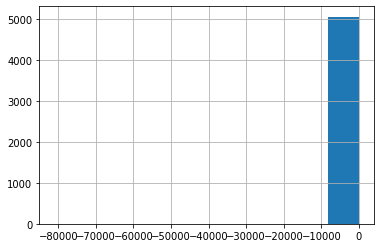

In [71]:
ecomnew[(ecomnew.invoice_c=='C') & (ecomnew.quantity<-1)].quantity.hist()

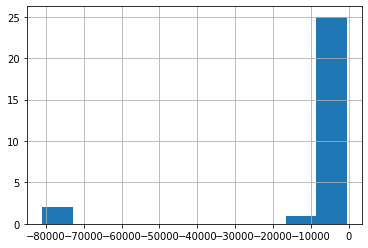

In [70]:
ecomnew[(ecomnew.invoice_c=='C') & (ecomnew.quantity<-500)].quantity.hist()

### This is interesting Not everytime high number of return does not mean wrong data . So we need to build a logic based on this condition....   

Some useful way of multiple condition data subsetting 

So where ever theere are C tagged invoice number it is most likely return or cancelled transaction. We shall develop our data cleaning criteria based on this.

### **Creating a condition DF for multiple condition for gross subsetting**



In [0]:
# an example of dataframe with key:value pair with a lambda function to check if there is any cancelled events along with negative quantity <-30


condition_df = pd.DataFrame({'cancelled events':ecomnew.invoiceno.apply(lambda X: X.startswith('C')), 
                             'negative quantity': (ecomnew.quantity<-30)})

In [73]:
condition_df["Flag"] = condition_df['cancelled events'] + condition_df['negative quantity']

condition_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,cancelled events,negative quantity,Flag
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [74]:
# Let's change the flag to number
condition_df["Flag"] = condition_df['cancelled events']*1 + condition_df['negative quantity']*1
condition_df.head()

,cancelled events,negative quantity,Flag
0,False,False,0
1,False,False,0
2,False,False,0
3,False,False,0
4,False,False,0


In [87]:
# Now extracting customer ID and dates from the above selection

ecomnew[condition_df.Flag==2].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,8,C
4853,C536812,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-36,12/2/2010 16:58,0.85,16546.0,United Kingdom,2010-12-02,2,C
4854,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C
4855,C536812,22593,CHRISTMAS GINGHAM STAR,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C
4856,C536812,22595,CHRISTMAS GINGHAM HEART,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C


In [78]:
ecomnew[condition_df.Flag==2][['customerid', 'newdate']]

,customerid,newdate
4287,15838.0,2010-12-02
4853,16546.0,2010-12-02
4854,16546.0,2010-12-02
4855,16546.0,2010-12-02
4856,16546.0,2010-12-02
...,...,...
536922,12558.0,2011-12-08
537615,15877.0,2011-12-08
540078,12985.0,2011-12-08
540079,12985.0,2011-12-08


In [79]:
#let's check how any unique combinations are available

ecomnew[condition_df.Flag==2][['customerid', 'newdate']].drop_duplicates().shape


(245, 2)

In [0]:
# Let's now create a databased of all unique combinations

new_condition_df=ecomnew[condition_df.Flag==2][['customerid', 'newdate']].drop_duplicates()

In [0]:
#Creating a flag variable in the unique database.
#idea is to map and merge the condition fd to original df to map the customer ID and date combination which are selected based on above condition
new_condition_df["Flag"]=1


In [82]:
new_condition_df.head()

,customerid,newdate,Flag
4287,15838.0,2010-12-02,1
4853,16546.0,2010-12-02,1
5232,14213.0,2010-12-03,1
7278,13941.0,2010-12-03,1
13042,14409.0,2010-12-06,1


In [0]:
# doing a left join with orginal df. Tis will keep all rows of orginal df and map based on multiple key and flag them
# post this we can select such transaction 
cleanecom= pd.merge(ecomnew,new_condition_df, on =['customerid','newdate'] , how='left')

In [84]:
cleanecom.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,5,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,7,5,NaN


In [85]:
cleanecom.Flag.value_counts()

1.0    3282
Name: Flag, dtype: int64

     3282 records are found to be problemetic. Let's filter it further

In [86]:
cleanecom[cleanecom.Flag==1].head() # Seeing the data after filtering 

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag
2570,536663,22867,HAND WARMER BIRD DESIGN,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,2,5,1.0
2571,536663,22633,HAND WARMER UNION JACK,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,2,5,1.0
2572,536663,22632,HAND WARMER RED RETROSPOT,24,12/2/2010 12:07,2.10,16546.0,United Kingdom,2010-12-02,2,5,1.0
2573,536663,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,12/2/2010 12:07,2.55,16546.0,United Kingdom,2010-12-02,2,5,1.0
2574,536663,22737,RIBBON REEL CHRISTMAS PRESENT,20,12/2/2010 12:07,1.65,16546.0,United Kingdom,2010-12-02,2,5,1.0


In [88]:
# sorting the values in a data frame

cleanecom[cleanecom.Flag==1].sort_values('customerid')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,2,5,1.0
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18,2,C,1.0
192792,C560540,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-1,7/19/2011 12:26,4.95,12415.0,Australia,2011-07-19,2,C,1.0
192782,C560540,23296,SET OF 6 TEA TIME BAKING CASES,-2,7/19/2011 12:26,1.25,12415.0,Australia,2011-07-19,2,C,1.0
192781,C560540,23297,SET 40 HEART SHAPE PETIT FOUR CASES,-2,7/19/2011 12:26,1.65,12415.0,Australia,2011-07-19,2,C,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
368950,577845,22960,JAM MAKING SET WITH JARS,12,11/22/2011 10:44,3.75,18139.0,United Kingdom,2011-11-22,2,5,1.0
283173,C569987,22439,6 ROCKET BALLOONS,-40,10/6/2011 19:54,0.65,18194.0,United Kingdom,2011-10-06,2,C,1.0
283174,C569987,22027,TEA PARTY BIRTHDAY CARD,-144,10/6/2011 19:54,0.36,18194.0,United Kingdom,2011-10-06,2,C,1.0
196031,C560903,22178,VICTORIAN GLASS HANGING T-LIGHT,-75,7/21/2011 17:47,1.06,18198.0,United Kingdom,2011-07-21,2,C,1.0


#### Lousy job done. looks like filter on negative condition is not properly worked. My bad.. Let's put this condition again

In [0]:
# We need to take different wway to encode the values looks like. Hence applying further condition on the data frame
cleanecom['qtyflag']= cleanecom.quantity.apply(lambda X : 0 if ((X < 100) & (X >-100)) else 1 ) 

In [94]:
#Let's see if it has worked

cleanecom.qtyflag.value_counts()

0    400146
1      6683
Name: qtyflag, dtype: int64

In [0]:
# now let's make the fina flag once again with imapct of both being 1 
cleanecom['finalflag']= cleanecom.Flag+cleanecom.qtyflag


In [96]:
cleanecom.finalflag.value_counts()

1.0    2785
2.0     497
Name: finalflag, dtype: int64

### So this means 497 cases such values are there where customer has cancelled the transaction and hence should be removed from dataset for any further analysis

In [97]:
# Let's see once the 497 cases before deleting the same

cleanecom[cleanecom.finalflag==2].head().sort_values('customerid')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,8,C,1.0,1,2.0
3649,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C,1.0,1,2.0
3650,C536812,22593,CHRISTMAS GINGHAM STAR,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C,1.0,1,2.0
3651,C536812,22595,CHRISTMAS GINGHAM HEART,-144,12/2/2010 16:58,0.72,16546.0,United Kingdom,2010-12-02,2,C,1.0,1,2.0
3652,C536812,22588,CARD HOLDER GINGHAM HEART,-192,12/2/2010 16:58,2.10,16546.0,United Kingdom,2010-12-02,2,C,1.0,1,2.0


Let's check dsome of these customer IDs quickly before deleting he data

In [98]:
cleanecom[(cleanecom.finalflag==2) & (cleanecom.customerid==15838.0)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,8,C,1.0,1,2.0


In [99]:
cleanecom[(cleanecom.customerid==15838.0) & (cleanecom.stockcode=="84347")]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,2010-12-02,8,C,1.0,1,2.0


### LEt's now remove 497 data points , looks like these are legit removal case. Again please try to check these data in excel and then decide to remove them. 

In [0]:
cleanecom= cleanecom[~(cleanecom.finalflag==2)] # Based on final flag we are removing the rows

In [102]:
cleanecom.shape, ecomnew.shape

((406332, 14), (406829, 11))

### Let's now have a look at the description column

         Frequency tables in Python:   
         Padas.Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [103]:
# Get a series of unique values in column 'Quantity' of the dataframe
uniqueValues = cleanecom['description'].unique()
print('Unique elements in column "Description" ')
print(uniqueValues)

Unique elements in column "Description" 
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "Z" BLING KEY RING'
 'PINK CRYSTAL SKULL PHONE CHARM' 'CREAM HANGING HEART T-LIGHT HOLDER']


In [104]:
cleanecom.description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2067
REGENCY CAKESTAND 3 TIER              1904
JUMBO BAG RED RETROSPOT               1646
ASSORTED COLOUR BIRD ORNAMENT         1417
PARTY BUNTING                         1415
                                      ... 
KNITTED RABBIT DOLL                      1
AMBER GLASS/SHELL/PEARL NECKLACE         1
GOLD/AMBER DROP EARRINGS W LEAF          1
WRAP  PINK FLOCK                         1
VINTAGE BLUE TINSEL REEL                 1
Name: description, Length: 3895, dtype: int64

### Iteratively you can continue to clean data as you wish . In the iterest of time I am moving to sent stage of data eloration and then we shall get into femous feature creation

### Pandas Cross tab- Titanic data example. I am sure you must have seen this data in some shape and form else just look in to kaggle datasets. This data is easy to find

**One-Way Tables**  
      
      my_tab = pd.crosstab(index=titanic_train["Survived"],
                              columns="count")

**Two-Way tables**


      pd.crosstab(index,columns,values=?,rownames=?,colnames=?,aggfunc=?,dropna=True,normalize=True)

      survived_sex = pd.crosstab(index=titanic_train["Survived"], 
                           columns=titanic_train["Sex"])

      survived_sex.index= ["died","survived"]

      survived_sex

In [105]:
kk = pd.crosstab(index=cleanecom["country"],columns="count")
print(kk)

col_0            count
country               
Asia               586
Australia         1218
Canada             151
Europe           42189
Middle East        140
South America       32
USA                291
United Kingdom  361481
Unspecified        244


In [106]:
pd.crosstab(index=cleanecom['country'],columns=cleanecom['finalflag'],values=cleanecom['finalflag'],aggfunc='count',dropna=True,normalize=True)

finalflag,1.0
country,
Asia,0.001436
Australia,0.058169
Europe,0.106284
USA,0.040215
United Kingdom,0.793896


### SORTING A PANDAS DATAFRAME

SYNTAX:  
     
     DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)

EXAMPLE:  

    df.sort_values(by=['col1', 'col2'], ascending=False, na_position='first')

------------------------------------------------------------
There is a function to SORT INDEX  
Explore df.sort_index

In [107]:
kk.sort_values(by=['count'],inplace=True)
kk.head(5)

col_0,count
country,
South America,32
Middle East,140
Canada,151
Unspecified,244
USA,291


#### Let's check for duplicate records

       SYNTAX:
       print('Duplicate entries: {}'.format(df_input_data.duplicated().sum()))
       
       EXAMPLE:
       duplicate_rows = df_input_data[df_input_data.duplicated()]
       duplicate_rows



In [108]:
print('Duplicate entries: {}'.format(cleanecom.duplicated().sum()))

Duplicate entries: 5221


In [109]:
duplicate_rows = cleanecom[cleanecom.duplicated()]
duplicate_rows

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406595,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,2011-12-09,2,5,NaN,0,NaN
406609,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,2011-12-09,2,5,NaN,0,NaN
406612,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,2011-12-09,2,5,NaN,0,NaN
406619,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,2011-12-09,2,5,NaN,0,NaN


In [110]:
# Not sure why these are duplicates as the data in each row is different in some way or other
duplicate_rows = cleanecom[cleanecom.duplicated() & (cleanecom.invoiceno=='536409')]
duplicate_rows

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,2010-12-01,2,5,NaN,0,NaN


### Looks like the above one is a data entry mistake. somehow people have forgotton to club the items in the single invoice. Hence these are not duplicates. However below is an example , how you can remove duplicates.

Please don't run it here... it will remove data without any justification



```
# Dropping the duplicates 
cleanecom = cleanecom.drop_duplicates(keep= 'first',inplace=True)
cleanecom.shape
```



### Let's create some date features :


*   Extract Month 
*   Year
*    Day of the transaction



In [0]:
cleanecom["year"] = cleanecom.newdate.dt.year
cleanecom["month"] = cleanecom.newdate.dt.month
cleanecom["day"] = cleanecom.newdate.dt.day

In [112]:
cleanecom.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,5,NaN,0,NaN,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,7,5,NaN,0,NaN,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,5,NaN,0,NaN,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,5,NaN,0,NaN,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,5,NaN,0,NaN,2010,12,1


# EDA - Exploratory data analysis before creating ABT
# & Feature Engineering 

### In case if you forgot my life long learning what I am still trying to share with you, "please know your data like your girlfriend/boyfriend"

### Exploratory data analysis is again dependent on your creativity and zeal to know your data. There is no boundery what you can do here. 

Wat I am going to share are some simple techniques (never enough) which might get you started on the journey.

Exploration should be done at 2 stages for any data:


*   Before you create your ABT(Analytical Base Table). which will be consumed by model. 
         This will help you to understand in case any anomally data before
         get's on aggregation. Like in case if you have not removed all 193 
         transactions we removed it might be lost in the aggregation at 
         customer level. However impact might be there. Same goes for null values as well
*   After you have actually created the ABT as well. 
        This would help you to study the relationship between features and help
        you to understand how each feature might impact your dependent variable.
        In case if you have any colier features which is not adding any value.
        Is there any noisy features which we should drom or transform.

        What Feature engineering may be required in order to capture the right pattern.



### Good way to start may be to understand how many unique values you have in each column:

In [114]:
print('Total number of records in the data frame: ', cleanecom.customerid.count() )
print('\n Count of unique values by each column:\n', cleanecom.nunique())




Total number of records in the data frame:  406332

 Count of unique values by each column:
 invoiceno            22085
stockcode             3683
description           3895
quantity               360
invoicedate          20374
unitprice              617
customerid            4370
country                  9
newdate                305
alpha_description       14
invoice_c                2
Flag                     1
qtyflag                  2
finalflag                1
year                     2
month                   12
day                     31
dtype: int64


In [115]:
cleanecom.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate', 'alpha_description',
       'invoice_c', 'Flag', 'qtyflag', 'finalflag', 'year', 'month', 'day'],
      dtype='object')

### Please take a subjective decision which one you want ot keep and which one you want to eliminate?

In [116]:
pd.crosstab(index=cleanecom.description,columns=cleanecom.alpha_description)

alpha_description,1,2,3,4,5,6,7,8,9,B,C,D,M,P
description,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,0,0,0,0,0,0,39,0,0,0,0,0,0,0
50'S CHRISTMAS GIFT BAG LARGE,0,110,0,0,0,0,0,0,0,0,0,0,0,0
DOLLY GIRL BEAKER,0,140,0,0,0,0,0,0,0,0,0,0,0,0
I LOVE LONDON MINI BACKPACK,0,70,0,0,0,0,0,0,0,0,0,0,0,0
I LOVE LONDON MINI RUCKSACK,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0,240,0,0,0,0,0,0,0,0,0,0,0,0
ZINC TOP 2 DOOR WOODEN SHELF,0,11,0,0,0,0,0,0,0,0,0,0,0,0
ZINC WILLIE WINKIE CANDLE STICK,0,0,0,0,0,0,0,193,0,0,0,0,0,0


In [118]:
# This step is  not required ... Hence creating a new dataframe cleanecom1 just to show the usecase . However we shall go ahead with cleanecom only for further analysis

cleanecom1=cleanecom[(cleanecom.alpha_description!='A') & (cleanecom.alpha_description!='B')] # Removing A and B for now
print('New distribution of th alpha char:\n', cleanecom.alpha_description.value_counts())
cleanecom1=cleanecom[['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate',
       'finalflag', 'year', 'month', 'day']] # Keeping only the required columns 

print('\n\n data frame cleaned:\n')
cleanecom1.head()


New distribution of th alpha char:
 2    334882
8     44567
4      8681
1      5340
7      5273
3      3640
9      1499
P      1200
M       456
5       444
C       150
6        97
D        91
B        12
Name: alpha_description, dtype: int64


 data frame cleaned:



,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,finalflag,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,NaN,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,NaN,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,NaN,2010,12,1


### Time to look for some plots. Obviously all the analysis at this point would be univariate study. 

You might want to take a look at few below links:

**BOXPLOT:** 
https://cduvallet.github.io/posts/2018/03/boxplots-in-python

**Few Other Plots:** https://towardsdatascience.com/make-your-data-talk-13072f84eeac

https://towardsdatascience.com/practical-statistics-visualization-with-python-plotly-770e96e35067




In [119]:
### let's import the wel-knowen libraries:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'boxes': [<matplotlib.lines.Line2D at 0x7f4ed2a8f2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ed2a8fcc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ed2aa1780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ed2aa1400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ed2a8f5c0>,
  <matplotlib.lines.Line2D at 0x7f4ed2a8f940>]}

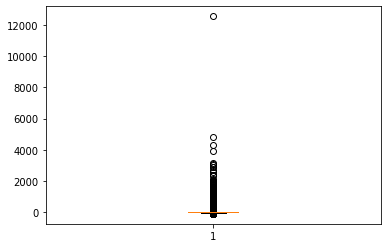

In [120]:
plt.boxplot(cleanecom.quantity)

### Too Many outliers we shall remove them soon.

Many a case before removing outlier you need to check in the data whether ourlier can be justified or not. It needs to make a business sense to remove them ... 

Treatment to outlier can be below:



*   Outlier removal directly from data--- here we are loosing information though
*   Caping/flooring the outlier to a certain value
*   Imputation of outlier based on a model



(array([3.82169e+05, 2.16500e+04, 1.36500e+03, 5.68000e+02, 2.22000e+02,
        1.46000e+02, 5.60000e+01, 3.10000e+01, 3.30000e+01, 1.00000e+01,
        1.80000e+01, 1.40000e+01, 1.60000e+01, 2.00000e+00, 4.00000e+00,
        3.00000e+00, 8.00000e+00, 2.00000e+00, 0.00000e+00, 4.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

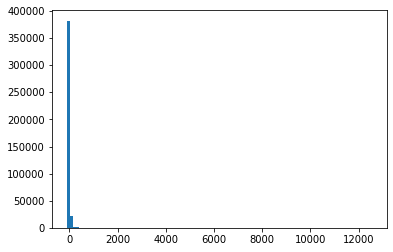

In [121]:
plt.hist(cleanecom.quantity,bins=100)

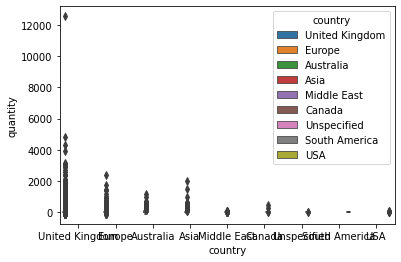

In [122]:
# using seaborn for box plots to check variation amongst countries
sns.boxplot(x='country', y='quantity', hue='country', data=cleanecom)



In [0]:
stripplot_kwargs = {'size': 12, 'alpha': 0.7}

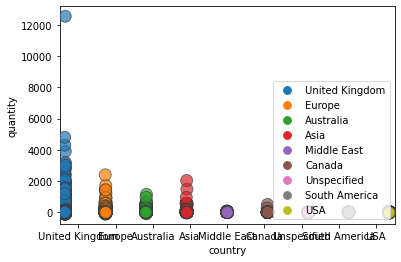

In [124]:
sns.stripplot(x='country', y='quantity', hue='country', data=cleanecom,
              jitter=True, dodge=True, linewidth=0.9,**stripplot_kwargs)
plt.legend(loc='lower right')

One thing which is evidant from the graph that we have not ceaned the values which are more than 30 or less than -30 properly. Mostlikely this is due to another condition which we put on the invoiceno starting with "C".

May be these have different pattern.

In [130]:
cleanecom[cleanecom.quantity>200].shape # just checking any count less than -100

(1635, 17)

In [131]:
cleanecom[cleanecom.quantity>200].head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag,year,month,day
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,12/1/2010 9:58,1.45,16029.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,12/1/2010 9:58,1.25,16029.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,12/1/2010 10:19,0.10,17511.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
729,536437,17021,NAMASTE SWAGAT INCENSE,600,12/1/2010 12:12,0.24,13694.0,United Kingdom,2010-12-01,1,5,NaN,1,NaN,2010,12,1
869,536477,21137,BLACK RECORD COVER FRAME,480,12/1/2010 12:27,3.39,16210.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
1767,536575,22095,LADS ONLY TISSUE BOX,252,12/1/2010 16:01,1.25,13777.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
1796,536579,21232,STRAWBERRY CERAMIC TRINKET BOX,216,12/1/2010 16:16,1.06,13777.0,United Kingdom,2010-12-01,2,5,NaN,1,NaN,2010,12,1
1823,536584,84029E,RED WOOLLY HOTTIE WHITE HEART.,384,12/1/2010 16:22,2.95,13777.0,United Kingdom,2010-12-01,8,5,NaN,1,NaN,2010,12,1
2765,536736,21791,VINTAGE HEADS AND TAILS CARD GAME,216,12/2/2010 12:59,1.06,17381.0,United Kingdom,2010-12-02,2,5,NaN,1,NaN,2010,12,2
2766,536736,22616,PACK OF 12 LONDON TISSUES,600,12/2/2010 12:59,0.29,17381.0,United Kingdom,2010-12-02,2,5,NaN,1,NaN,2010,12,2


In [132]:
cleanecom[cleanecom.quantity>200].customerid.value_counts() # checking howmany customer has ordered such large items 

14646.0    156
17450.0    102
18102.0    101
16684.0     85
12415.0     74
          ... 
12435.0      1
17443.0      1
17033.0      1
15311.0      1
17856.0      1
Name: customerid, Length: 253, dtype: int64

In [133]:
cleanecom[cleanecom.quantity>200].newdate.value_counts() # Checking which all day this is been ordered 

2011-09-20    39
2011-10-05    38
2011-08-11    32
2011-06-09    28
2011-08-04    26
              ..
2011-02-28     1
2011-03-21     1
2011-05-25     1
2011-01-17     1
2011-01-31     1
Name: newdate, Length: 254, dtype: int64

#### We should review these orders in details by taking the data subset out in an excel and veryfying this row by row.

**We can create sales column based on UnitPrice*Quantity and do an outlier treatment based on that ..... However as of now doing it based on quantity itself**

However as of now I am going to remove all of them 

In [0]:
cleanecom['qtyflag']= cleanecom.quantity.apply(lambda X : 0 if ((X < 100) & (X >-100)) else 1 ) # this is the function whcich worked 

In [136]:
cleanecom[cleanecom.qtyflag==1].tail(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag,year,month,day
406465,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,12/9/2011 10:46,0.19,12985.0,United Kingdom,2011-12-09,2,5,NaN,1,NaN,2011,12,9
406622,581566,23404,HOME SWEET HOME BLACKBOARD,144,12/9/2011 11:50,3.26,18102.0,United Kingdom,2011-12-09,2,5,NaN,1,NaN,2011,12,9
406631,581567,21326,AGED GLASS SILVER T-LIGHT HOLDER,144,12/9/2011 11:56,0.55,16626.0,United Kingdom,2011-12-09,2,5,NaN,1,NaN,2011,12,9


In [0]:
# Removing all values >100 and <-100. However please do it wisely , I am just trying to show different iteration on the data. This way of removal is not right. 
# All the items are low price items and looks like for decoration. Hence bulk order may be possible

cleanecom=cleanecom[cleanecom.qtyflag==0].copy()

(array([2.50000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 2.80000e+01, 2.00000e+00, 2.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 5.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.40000e+01, 8.20000e+01,
        2.00000e+00, 1.00000e+00, 6.00000e+00, 2.20000e+01, 5.00000e+00,
        5.60000e+01, 6.00000e+00, 2.40000e+01, 2.00000e+00, 1.80000e+01,
        4.00000e+00, 3.70000e+01, 2.47000e+02, 1.90000e+01, 5.40000e+01,
        4.60000e+01, 6.20000e+01, 3.80000e+01, 5.65000e+02, 2.11000e+02,
        2.24000e+02, 6.54000e+02, 1.03200e+03, 5.17700e+03, 0.00000e+00,
        1.31317e+05, 5.91310e+04, 4.58380e+04, 1.29430e+04, 2.23830e+04,
        6.03740e+04, 4.37000e+02, 4.39400e+03, 1.63000e+03, 4.83700e+03,
        1.25000e+02, 2.37810e+04, 5.03100e+03, 1.54000e+02, 1.10600e+03,
        1.01200e+03, 2.00000e+01, 2.90000e+01, 3.75

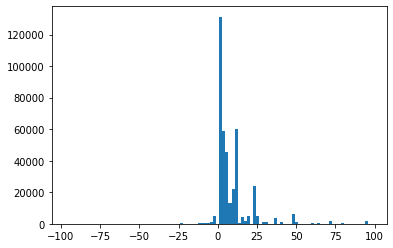

In [138]:
plt.hist(cleanecom.quantity,bins=100)

#### As -ve quantity can be safely asumed to be return transactions we might need to create a feature or flag flagging these transactions

While creating ABT we might treat these as seperate transactions or may be count numner of transactions which are returned

Also as the current price is unit price we need to create column for the **total sales** as well

In [0]:
cleanecom[cleanecom.quantity<0].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,finalflag,year,Month,Day,qtyflag,return
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01,0.0,2010,12,1,0,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01,0.0,2010,12,1,0,1


In [0]:
# As you can see in the above data even discount is having a negative quanityty so while creating flag for return this should not be considered 
cleanecom['return']= cleanecom[cleanecom.stockcode!='D'].quantity.apply(lambda X : 1 if (X < 0) else 0 ) # Creating a return flag on the data

### Word of caution value_counts does not show how many null valuse go created in the flag. It is wise to check the same before subsetting the data based on flag

In [141]:
cleanecom['return'].value_counts() 

0.0    391458
1.0      8613
Name: return, dtype: int64

In [142]:
cleanecom.isna().sum()

invoiceno                 0
stockcode                 0
description               0
quantity                  0
invoicedate               0
unitprice                 0
customerid                0
country                   0
newdate                   0
alpha_description         0
invoice_c                 0
Flag                 397361
qtyflag                   0
finalflag            397361
year                      0
month                     0
day                       0
return                   75
dtype: int64

In [0]:
cleanecom['return'].fillna(0,inplace=True)

In [149]:
cleanecom['return'].isna().sum() # no null now

0

#### Creating another feature named sales

In [0]:
cleanecom['sales']=cleanecom.unitprice*cleanecom.quantity # creating sales feature

In [151]:
cleanecom[cleanecom.quantity<0].head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag,year,month,day,return,sales
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,2010-12-01,D,C,NaN,0,NaN,2010,12,1,0.0,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,2010-12-01,3,C,NaN,0,NaN,2010,12,1,1.0,-4.65


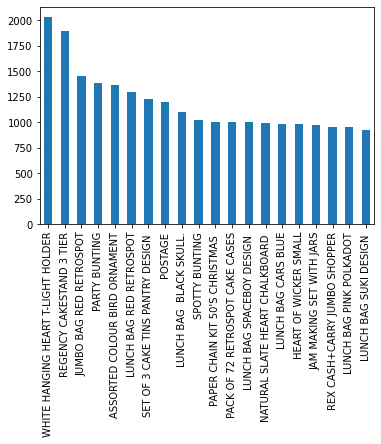

In [153]:
cleanecom['description'].value_counts().head(20).plot.bar()

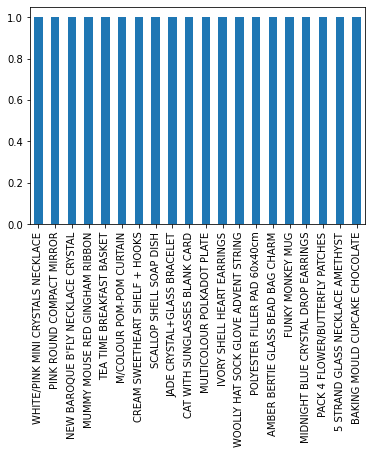

In [154]:
cleanecom['description'].value_counts().tail(20).plot.bar()

In [155]:
cleanecom.dtypes

invoiceno                    object
stockcode                    object
description                  object
quantity                      int64
invoicedate                  object
unitprice                   float64
customerid                  float64
country                      object
newdate              datetime64[ns]
alpha_description            object
invoice_c                    object
Flag                        float64
qtyflag                       int64
finalflag                   float64
year                          int64
month                         int64
day                           int64
return                      float64
sales                       float64
dtype: object

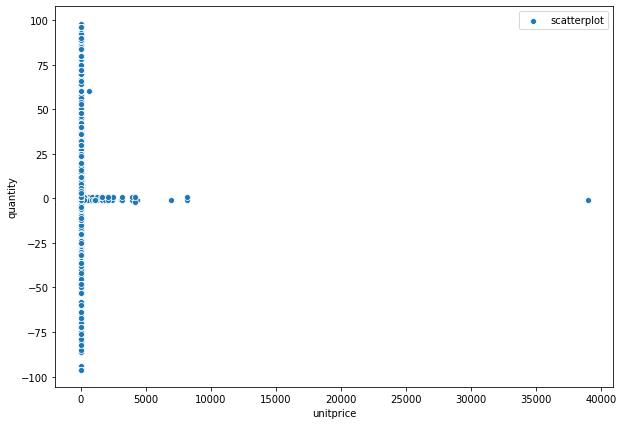

In [156]:
# With Seaborn
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
sns.scatterplot(x='unitprice', y='quantity', data=cleanecom, 
                label="scatterplot");

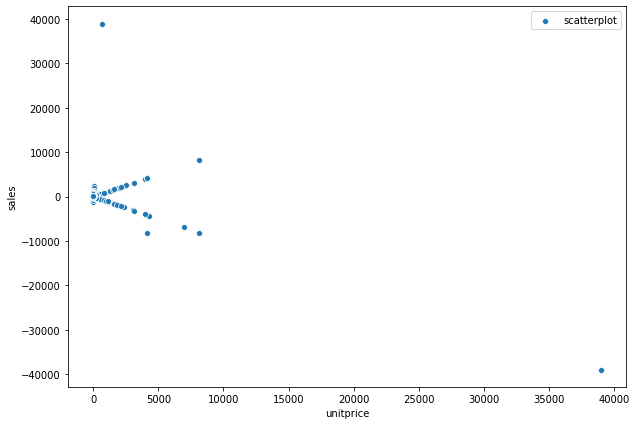

In [157]:

figure(figsize=(10, 7))
sns.scatterplot(x='unitprice', y='sales', data=cleanecom, 
                label="scatterplot");


**Looks like there are outliers on price , sales as well .** 
Looks like there are obseravations which has zero price as well: Let's check them

In [158]:
# How many zero price observation are existing?
print("number of entries with price zero:", cleanecom[cleanecom.unitprice==0].shape[0])

print("Let's look at some sample data :  \n")

cleanecom[cleanecom.unitprice==0].head(3)

number of entries with price zero: 34
Let's look at some sample data :  



,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,alpha_description,invoice_c,Flag,qtyflag,finalflag,year,month,day,return,sales
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Europe,2010-12-05,2,5,NaN,0,NaN,2010,12,5,0.0,0.0
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,2010-12-16,2,5,NaN,0,NaN,2010,12,16,0.0,0.0
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,Europe,2010-12-21,2,5,NaN,0,NaN,2010,12,21,0.0,0.0


In [160]:
cleanecom.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate', 'alpha_description',
       'invoice_c', 'Flag', 'qtyflag', 'finalflag', 'year', 'month', 'day',
       'return', 'sales'],
      dtype='object')

### We might want to get rid of these observation! What do you thik?
choose wisely and proceed further.

In [0]:
# Let's remove the zeros as of now : for you in case if you think this would help please keep these
# Will do a column subsetting as well -- just to remove all unsable flag columns
cleanecom=cleanecom[cleanecom.unitprice!=0][['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate',
       'year', 'month', 'day', 'return', 'sales']]

In [162]:
cleanecom.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,newdate,year,month,day,return,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010,12,1,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010,12,1,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010,12,1,0.0,22.00


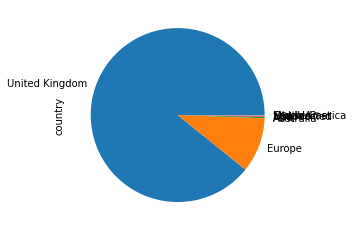

In [163]:
# Example of pie chart
cleanecom['country'].value_counts().plot.pie()

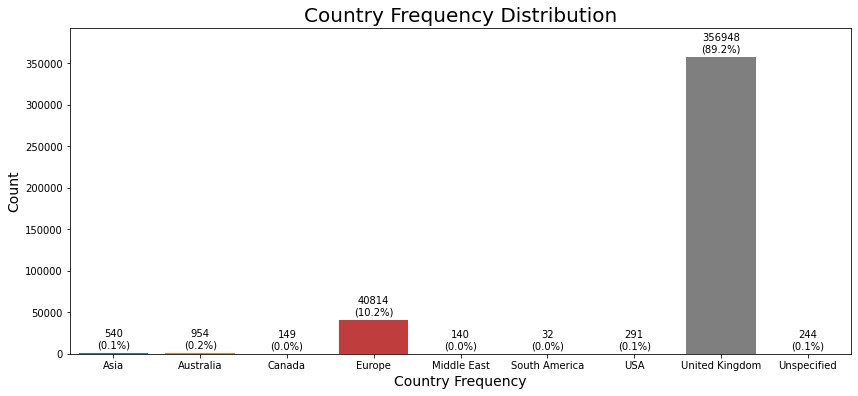

In [164]:
country_ = cleanecom['country'].value_counts().sort_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x=country_.index, y=country_.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n({p.get_height() / sum(country_) * 100:.1f}%)', 
                xy=(p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,5), textcoords='offset points')
    
ax.set_ylim(0, 1.1*max(country_))
plt.xlabel('Country Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Country Frequency Distribution', fontsize=20)
plt.show()

### I wanted to again reiterate -- this is definitely not enough of data exploration. There are more to it . All we wanted to ensure that we show you the glimps of it 

Please do look into different cross tabs, scatter plots and manay more innovating way to understand data before you proceed further on building your ABT....

### Some summary statistics would be useful do you think?

Let's see some of it

In [165]:
cleanecom.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,400112.0,8.883348,12.496614,-96.000,2.00,5.00,12.00,98.0
unitprice,400112.0,3.494995,69.893851,0.001,1.25,1.95,3.75,38970.0
customerid,400112.0,15288.166496,1713.101517,12347.000,13956.00,15154.00,16791.00,18287.0
year,400112.0,2010.933846,0.248551,2010.000,2011.00,2011.00,2011.00,2011.0
month,400112.0,7.611366,3.420621,1.000,5.00,8.00,11.00,12.0
day,400112.0,15.038204,8.657432,1.000,7.00,15.00,22.00,31.0
return,400112.0,0.021526,0.145131,0.000,0.00,0.00,0.00,1.0
sales,400112.0,16.380779,97.981931,-38970.000,4.20,10.50,17.85,38970.0


## Let's do some outlier treatmnt before we go ahead and start building ABT

## Outlier removal methodologies -- popular univariate ones 

Qunatile Method:



```
q_low = df["col"].quantile(0.01)
q_hi  = df["col"].quantile(0.99)

df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]
```




6-Sigma method:

```
df = pd.DataFrame({'Data':np.random.normal(size=200)})
# example dataset of normally distributed data. 

df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

df[~(np.abs(df.Data-df.Data.mean()) > (3*df.Data.std()))]
# or if you prefer the other way around
```

IQR Method:



```
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

```




{'boxes': [<matplotlib.lines.Line2D at 0x7f4ecf86f320>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ecf745160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ecf745be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ecf745860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ecf7e1ef0>,
  <matplotlib.lines.Line2D at 0x7f4ecf7b6da0>]}

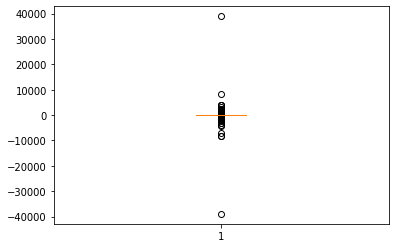

In [166]:
plt.boxplot(cleanecom.sales) # Too much outlier

In [167]:
# Getting pecentile across customer sales

arr_univariate_righttail = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 1]

print(cleanecom['sales'].quantile(arr_univariate_righttail))

0.910       34.00000
0.920       35.70000
0.930       39.80000
0.940       45.00000
0.950       51.00000
0.960       61.20000
0.970       73.44000
0.980       90.00000
0.990      128.88000
0.995      178.61125
1.000    38970.00000
Name: sales, dtype: float64


In [0]:
# I'm going to cut the tail where sales is greater than 99th percentile. This is a bit subjective and you can remove outlier according to your judgment and business understanding

cleanecom=cleanecom[~(cleanecom['sales']>cleanecom['sales'].quantile(0.995))]




In [176]:
arr_univariate_lefttail = [0,0.001,0.002,0.005, 0.01, 0.02, 0.05, 0.07, 0.1, 0.15]

print(cleanecom['sales'].quantile(arr_univariate_lefttail))

0.000   -38970.00
0.001      -72.00
0.002      -38.16
0.005      -17.00
0.010       -9.24
0.020       -1.65
0.050        0.85
0.070        1.25
0.100        1.65
0.150        2.50
Name: sales, dtype: float64


In [0]:
cleanecom=cleanecom[~(cleanecom['sales']<cleanecom['sales'].quantile(0.001))]

{'boxes': [<matplotlib.lines.Line2D at 0x7f4ecf66d908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ecf5fa358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ecf5fadd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ecf5faa58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ecf66dc18>,
  <matplotlib.lines.Line2D at 0x7f4ecf66df98>]}

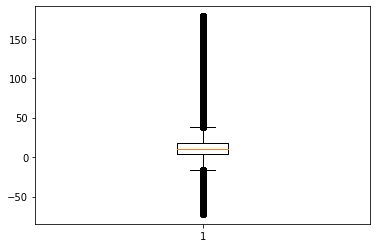

In [178]:
plt.boxplot(cleanecom.sales)

## Data Summarization: 

we shall now look at different aggregation functions and then we shall get on to Dynamic reference frame

## Group By statement:

Let's understand how to summarize the data at customer level:


      *   DF.groupby(["column1", "column2"...]).agg({"column3": ["sum", "mean"], "column4": ["std", "nunique","count/size"] }).....
       You can define a custom fuction some where and use it like AB = np.mean(np.sqrt(x)).
     *   Data frame . for by( list of columns as index). Aggregation declearation(   "columnK" : list of aggregation function with space like).

### Creating a monthly level aggregated data.

In [180]:
cleanecom.groupby(["country","customerid","year","month"]).agg({"quantity":["sum","count"], "sales": ["sum"], "unitprice": ["mean"], "stockcode": ["nunique"], "return":["sum"]})

quantity          sales unitprice stockcode return
                                       sum count      sum      mean   nunique    sum
country     customerid year month                                                   
Asia        12744.0    2011 1          989    54  1731.07  2.548519        54    0.0
                            4         1255    51  2006.84  5.550196        51    0.0
                            7         1872    74  3790.92  3.106892        74    0.0
                            10         499    31   927.26  5.440000        31    0.0
            12753.0    2010 12        2309    47  3518.59  1.941277        47    0.0
...                                    ...   ...      ...       ...       ...    ...
Unspecified 12743.0    2011 7          319   134   546.43  3.038582       114    0.0
            14265.0    2011 7          271    15   252.05  3.460667        15    0.0
                            8           59    16   278.13  8.115000        16    0.0
            16320.0    2011 5          654    47   852.68  2.059787        47    0.0
                            6           78     9   185.78  4.677778         9    0.0

[13352 rows x 6 columns]

In [0]:
# Month 1-12 does not look good : Let's chaneg it to proper months
# date time operation comes with lots of option. changing the month number to the name is one of them 
cleanecom['month'] = cleanecom.newdate.dt.month_name()

In [182]:
cleanecom.groupby(
    by=['customerid','year','month'],
    as_index=True).agg(  
        total_quantity = ('quantity','sum'),            # total quantity purchased
        average_quantity = ('quantity','mean'),         # monthly average quanity purchased in each transaction
        products_spread = ('stockcode', 'nunique'),     # number of distinct products purchased
        transactions = ('invoiceno', "nunique"),        # total number of transactions done
        no_of_days_shopped = ('newdate', "nunique"),    # How many days customer shopped
        total_sales = ('sales', 'sum'),                 # Total amount spent    
        no_return=('return','sum'),                     # Number of returns
        max_price= ('unitprice','max'),                 # highest price paid by customer
        avg_price=('unitprice','mean'),                 # average price paid by customer in the month
        avg_spend= ('sales','mean'),                    # average spend by the customer on a given month
)

total_quantity  average_quantity  products_spread  transactions  no_of_days_shopped  total_sales  no_return  max_price  avg_price  avg_spend
customerid year month                                                                                                                                                  
12347.0    2010 December              319         10.290323               31             1                   1       711.79        0.0       5.95   2.890000  22.960968
           2011 April                 243         10.565217               23             1                   1       386.65        0.0      12.75   2.663043  16.810870
                August                277         12.590909               22             1                   1       584.91        0.0      12.75   3.101818  26.586818
                December              192         17.454545               11             1                   1       224.82        0.0       2.08   1.230909  20.438182
                January               315         10.862069               29             1                   1       475.39        0.0      12.75   2.523103  16.392759
...                                   ...               ...              ...           ...                 ...          ...        ...        ...        ...        ...
18283.0    2011 November              450          2.054795              115             4                   3       651.56        0.0       3.75   1.455525   2.975160
                October                63          1.575000               38             1                   1       114.65        0.0      15.95   2.087000   2.866250
                September              95          2.021277               47             1                   1       134.90        0.0       4.00   1.401915   2.870213
18287.0    2011 May                   488         16.827586               27             1                   1       765.28        0.0       8.50   1.962759  26.388966
                October              1098         26.780488               38             2                   2      1072.00        0.0       4.25   1.161707  26.146341

[13350 rows x 10 columns]

### In case if you don't want the returns to be included 



```

ecom_cust_level = cleanecom[(cleanecom['return']==0)].groupby(
    by=['customerid','year','Month'],
    as_index=True).agg(  
        total_quantity = ('quantity','sum'),            # total quantity purchased
        average_quantity = ('quantity','mean'),         # monthly average quanity purchased in each transaction
        products_spread = ('stockcode', 'nunique'),     # number of distinct products purchased
        transactions = ('invoiceno', "nunique"),        # total number of transactions done
        no_of_days_shopped = ('newdate', "nunique"),    # How many days customer shopped
        total_sales = ('sales', 'sum'),           # Total amount spent    
      #  no_return=('return','sum'),                     # Number of returns
        max_price= ('unitprice','max'),                 # highest price paid by customer
        avg_price=('unitprice','mean'),                 # average price paid by customer in the month
        avg_spend= ('sales','mean'),                    # average spend by the customer on a given month
).reset_index()
```




## ABT ( Aalytical Base Table) creation:

We are going to show two approach here in case if we want to create a **model to identify propensity of the cutomer shopping next month**

There can be different ways to do this... we are just going to show one of the easy non-program heavy way of doing it

### So we have data from December 2010 to December 2011

#### Now we need to create a train and test data set along with OOT (out of time )


> 

*   DF1= Create a dataset from Dec-2010 to Oct-2011
*   DF2=Create another dataset from Dec-2010 to Nov-2011. delete all december data
*   DF3 Create dataset for Nov-2011 seperately with only customerid also for month of Dec2011(DF4)
*   Aggreate DF1 and DF 2 seperately
*   Merge aggregated-DF3 with DF1 to flag the customer who shopped ( change the column names)--- this will be used for training and testing 
*   Merge aggregated-DF2 with DF4 to flag the dataset with customer shopped in Dec-2011 .... this will be used for OOT





In [183]:
# we shall quickly analyse the time period that we can use to train and do out of time validation
cleanecom["year_month"]= cleanecom[["year","month"]].apply(lambda X: "{}_{}".format(X["year"], X["month"][0:3]),axis=1)
cleanecom["year_month"].unique()

array(['2010_Dec', '2011_Jan', '2011_Feb', '2011_Mar', '2011_Apr',
       '2011_May', '2011_Jun', '2011_Jul', '2011_Aug', '2011_Sep',
       '2011_Oct', '2011_Nov', '2011_Dec'], dtype=object)

In [184]:
# Let us also check if all the months have complete data points. That is has transaction been covered across most of the days in a month
cleanecom.groupby(by=['year_month']).agg({"newdate":["nunique"]})
# It looks like 2011 Dec could be incomplete as it as only 8 day of transactions 

,newdate
,nunique
year_month,
2010_Dec,20
2011_Apr,21
2011_Aug,26
2011_Dec,8
2011_Feb,24
2011_Jan,24
2011_Jul,26
2011_Jun,26


In [0]:
# Let us create our training dataset. For this we are going to use customer behavior from 2010 Dec to  2011 Sep (10 months) to train the model. Target would be customers shopping in 2011 Oct
start_date = '12-01-2010'
end_date = '09-01-2011'

# Subsetting our train DF 
cleanecom_train_obs=cleanecom[(cleanecom["newdate"]>=start_date) & (cleanecom["newdate"]<end_date)]

In [186]:
# Building ABT1 for training. We are going ot use groupby to create our (ABT)database. Benefit being you can rename the columns as per your wish and subset the data while doing so
ABT1_train = cleanecom_train_obs.groupby(
    by=['customerid'],
    as_index=True).agg(  
        total_quantity = ('quantity','sum'),            # total quantity purchased
        average_quantity = ('quantity','mean'),         # monthly average quanity purchased in each transaction
        products_spread = ('stockcode', 'nunique'),     # number of distinct products purchased
        transactions = ('invoiceno', "nunique"),        # total number of transactions done
        no_of_days_shopped = ('newdate', "nunique"),    # How many days customer shopped
        total_sales = ('sales', 'sum'),                 # Total amount spent    
        no_return=('return','sum'),                     # Number of returns
        max_price= ('unitprice','max'),                 # highest price paid by customer
        avg_price=('unitprice','mean'),                 # average price paid by customer in the month
        avg_spend= ('sales','mean'),                    # average spend by the customer on a given month
).reset_index()

ABT1_train.head()

,customerid,total_quantity,average_quantity,products_spread,transactions,no_of_days_shopped,total_sales,no_return,max_price,avg_price,avg_spend
0,12347.0,1350,10.975610,81,5,5,2541.26,0.0,12.75,2.811951,20.660650
1,12348.0,774,45.529412,16,3,3,795.08,0.0,40.00,5.458235,46.769412
2,12350.0,197,11.588235,17,1,1,334.40,0.0,40.00,3.841176,19.670588
3,12352.0,188,4.476190,25,5,4,601.18,7.0,40.00,5.225476,14.313810
4,12353.0,20,5.000000,4,1,1,89.00,0.0,9.95,6.075000,22.250000


In [187]:
# Quick check on the data
ABT1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,3293.0,15281.355299,1724.417209,12347.000000,13792.000000,15241.000000,16768.000000,18287.00
total_quantity,3293.0,612.782569,1395.070395,-158.000000,115.000000,267.000000,657.000000,31520.00
average_quantity,3293.0,10.509676,9.362139,-26.000000,5.250000,8.888889,12.722222,96.00
products_spread,3293.0,48.997874,65.581086,1.000000,13.000000,29.000000,62.000000,1192.00
transactions,3293.0,3.996356,6.571597,1.000000,1.000000,2.000000,4.000000,132.00
no_of_days_shopped,3293.0,3.526875,4.935824,1.000000,1.000000,2.000000,4.000000,88.00
total_sales,3293.0,1090.012995,2319.953791,-367.000000,226.370000,487.750000,1156.580000,58851.11
no_return,3293.0,1.571515,5.084535,0.000000,0.000000,0.000000,1.000000,92.00
max_price,3293.0,14.640938,16.634974,0.390000,7.950000,12.750000,15.950000,165.00
avg_price,3293.0,3.569416,4.265009,0.298235,2.309607,3.046778,4.042121,165.00


In [189]:
# How many customers we have in our training dataset
ABT1_train.customerid.count()

3293

In [0]:
# Let us create our target variable for our training. This would be customers shopping in 2011 Oct
start_date = '10-01-2011'
end_date = '11-01-2011'

# Subsetting our train DF for capturing response/target
cleanecom_train_tar=cleanecom[(cleanecom["newdate"]>=start_date) & (cleanecom["newdate"]<end_date)]

In [0]:
# subsetting those customers shopped on 2011 Oct
train_target_cust=pd.DataFrame(cleanecom_train_tar.customerid.unique())
train_target_cust.rename(columns = {0:'customerid'}, inplace = True) 
train_target_cust['target']=1

In [192]:
# How many customers who have shopped in 2011 Oct
train_target_cust.customerid.count()

1407

In [193]:
# We shall now intgrate the training target dataset to the training DF
ABT1_train_tar = pd.merge(ABT1_train, train_target_cust, how='left', on=['customerid'])
ABT1_train_tar['target'].fillna(0,inplace=True)
ABT1_train_tar.head()

,customerid,total_quantity,average_quantity,products_spread,transactions,no_of_days_shopped,total_sales,no_return,max_price,avg_price,avg_spend,target
0,12347.0,1350,10.975610,81,5,5,2541.26,0.0,12.75,2.811951,20.660650,1.0
1,12348.0,774,45.529412,16,3,3,795.08,0.0,40.00,5.458235,46.769412,0.0
2,12350.0,197,11.588235,17,1,1,334.40,0.0,40.00,3.841176,19.670588,0.0
3,12352.0,188,4.476190,25,5,4,601.18,7.0,40.00,5.225476,14.313810,0.0
4,12353.0,20,5.000000,4,1,1,89.00,0.0,9.95,6.075000,22.250000,0.0


In [194]:
# Lets finally check how many cutomers in the training and of them who have shopped in 2011 Oct
print("Total # of customers in training data is {}".format(ABT1_train_tar.customerid.count()))
print("Total # of customers who have shopped in training window and target window is {}".format(ABT1_train_tar.target.sum()))

Total # of customers in training data is 3293
Total # of customers who have shopped in training window and target window is 965.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f4ecdea9d68>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ecde9c7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ecde91278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ecde9ceb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ecde9c0b8>,
  <matplotlib.lines.Line2D at 0x7f4ecde9c438>]}

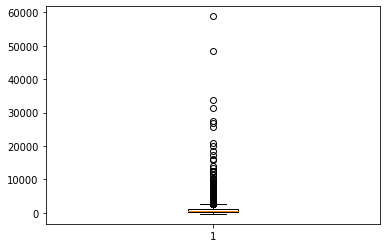

In [195]:
# It is generally a good practice to check outliers even after creating the ABT2. Since outliers create noise in your training data, it is advisable to remove if any
# However we should not be removing outliers in Out of Time validation data as it acts a true data and it will give us a view of how model performs on real world data
plt.boxplot(ABT1_train_tar.total_sales)

# It looks like Sales has outliers. There are few outlier records

In [196]:
# Getting pecentile across customer sales

arr_univariate_righttail = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 1]

print(ABT1_train_tar['total_sales'].quantile(arr_univariate_righttail))

0.910     2596.0440
0.920     2742.4576
0.930     2992.6068
0.940     3283.3376
0.950     3790.2320
0.960     4248.2936
0.970     4945.8136
0.980     6166.1016
0.990     8071.9444
0.995    12266.5580
1.000    58851.1100
Name: total_sales, dtype: float64


In [197]:
# I'm going to cut the tail where sales is greater than 99th percentile. This is a bit subjective and you can remove outlier according to your judgment and business understanding

ABT1_train_tar=ABT1_train_tar[~(ABT1_train_tar['total_sales']>ABT1_train_tar['total_sales'].quantile(0.995))]

# Now, Lets finally check how many cutomers in the training and of them who have shopped in 2011 Oct after the outlier removal
print("Total # of customers in training data is {}".format(ABT1_train_tar.customerid.count()))
print("Total # of customers who have shopped in training window and target window is {}".format(ABT1_train_tar.target.sum()))


Total # of customers in training data is 3276
Total # of customers who have shopped in training window and target window is 949.0


## Here are the steps to create the ABT2 for Out of Time Validation (OOT) Data

What is OOT? this is

In [0]:
# Time of building the ABT2 for Out of Time Validation. For this we are going to use customer behavior from 2011 Jan to  2011 Oct (10 months) to train the model. Target would be customers shopping in 2011 Nov
start_date = '01-01-2011'
end_date = '10-01-2011'

# Subsetting our train DF 
cleanecom_oot_obs=cleanecom[(cleanecom["newdate"]>=start_date) & (cleanecom["newdate"]<end_date)]

In [199]:
# Building ABT2 for OOT. 
ABT2_oot = cleanecom_oot_obs.groupby(
    by=['customerid'],
    as_index=True).agg(  
        total_quantity = ('quantity','sum'),            # total quantity purchased
        average_quantity = ('quantity','mean'),         # monthly average quanity purchased in each transaction
        products_spread = ('stockcode', 'nunique'),     # number of distinct products purchased
        transactions = ('invoiceno', "nunique"),        # total number of transactions done
        no_of_days_shopped = ('newdate', "nunique"),    # How many days customer shopped
        total_sales = ('sales', 'sum'),                 # Total amount spent    
        no_return=('return','sum'),                     # Number of returns
        max_price= ('unitprice','max'),                 # highest price paid by customer
        avg_price=('unitprice','mean'),                 # average price paid by customer in the month
        avg_spend= ('sales','mean'),                    # average spend by the customer on a given month
).reset_index()

ABT2_oot.head()

,customerid,total_quantity,average_quantity,products_spread,transactions,no_of_days_shopped,total_sales,no_return,max_price,avg_price,avg_spend
0,12347.0,1031,11.206522,64,4,4,1829.47,0.0,12.75,2.785652,19.885543
1,12348.0,391,43.444444,6,3,3,587.40,0.0,40.00,14.077778,65.266667
2,12350.0,197,11.588235,17,1,1,334.40,0.0,40.00,3.841176,19.670588
3,12352.0,343,4.635135,46,7,6,1233.68,7.0,40.00,5.999595,16.671351
4,12353.0,20,5.000000,4,1,1,89.00,0.0,9.95,6.075000,22.250000


In [200]:
# How many customers we have in our training dataset
ABT2_oot.customerid.count()

3401

In [0]:
# Let us create our target variable for our OOT. This would be customers shopping in 2011 Nov
start_date = '11-01-2011'
end_date = '12-01-2011'

# Subsetting our OOT DF for capturing response/target
cleanecom_oot_tar=cleanecom[(cleanecom["newdate"]>=start_date) & (cleanecom["newdate"]<end_date)]

In [0]:
# subsetting those customers shopped on 2011 Nov
oot_target_cust=pd.DataFrame(cleanecom_oot_tar.customerid.unique())
oot_target_cust.rename(columns = {0:'customerid'}, inplace = True) 
oot_target_cust['target']=1

In [203]:
# How many customers who have shopped in 2011 Nov
oot_target_cust.customerid.count()

1682

In [204]:
# We shall now intgrate the OOT target dataset to the OOT DF
ABT2_oot_tar = pd.merge(ABT2_oot, oot_target_cust, how='left', on=['customerid'])
ABT2_oot_tar['target'].fillna(0,inplace=True)
ABT2_oot_tar.head()

,customerid,total_quantity,average_quantity,products_spread,transactions,no_of_days_shopped,total_sales,no_return,max_price,avg_price,avg_spend,target
0,12347.0,1031,11.206522,64,4,4,1829.47,0.0,12.75,2.785652,19.885543,0.0
1,12348.0,391,43.444444,6,3,3,587.40,0.0,40.00,14.077778,65.266667,0.0
2,12350.0,197,11.588235,17,1,1,334.40,0.0,40.00,3.841176,19.670588,0.0
3,12352.0,343,4.635135,46,7,6,1233.68,7.0,40.00,5.999595,16.671351,1.0
4,12353.0,20,5.000000,4,1,1,89.00,0.0,9.95,6.075000,22.250000,0.0


In [205]:
# Lets finally check how many cutomers in the oot and of them who have shopped in 2011 Nov
print("Total # of customers in OOT data is {}".format(ABT2_oot_tar.customerid.count()))
print("Total # of customers who have shopped in OOT window and target window is {}".format(ABT2_oot_tar.target.sum()))

Total # of customers in OOT data is 3401
Total # of customers who have shopped in OOT window and target window is 1228.0


## So now you have both training data ABT and OOT data ABT done and ready for Model training and validation.

We want to show another way of creating the ABT . This is useful when you have large nuber of columns and doing hardcoded feature is costly ask.


Insted of hardcoding the columns of ABT in groupby statement .. you might want to do it in little smarter way.

However I still like the earleir approach for any quanitative data. It gives me a feel of satisfaction.



In [0]:
# Just to showcase I am taking less data points
ABT2= cleanecom.groupby(["customerid","year","month"]).agg({"quantity":["sum","count"], "sales": ["sum"], "unitprice": ["mean"], "stockcode": ["nunique"], "return":["sum"]}).reset_index()

In [210]:
ABT2.head(3)

customerid  year     month quantity         sales unitprice stockcode return
                                  sum count     sum      mean   nunique    sum
0    12347.0  2010  December      319    31  711.79  2.890000        31    0.0
1    12347.0  2011     April      243    23  386.65  2.663043        23    0.0
2    12347.0  2011    August      277    22  584.91  3.101818        22    0.0

In [211]:
ABT2.columns

MultiIndex([('customerid',        ''),
            (      'year',        ''),
            (     'month',        ''),
            (  'quantity',     'sum'),
            (  'quantity',   'count'),
            (     'sales',     'sum'),
            ( 'unitprice',    'mean'),
            ( 'stockcode', 'nunique'),
            (    'return',     'sum')],
           )

### We have a multiindex colums ........ ravel() comes to rescue. Thsi is a very nice functionality and in the below example I shall show you how you can get maximum benefit of this!

In [212]:
# Hope you see how the column names are? we need to somehow join them and change dynamically

ABT2.columns.ravel()

array([('customerid', ''), ('year', ''), ('month', ''),
       ('quantity', 'sum'), ('quantity', 'count'), ('sales', 'sum'),
       ('unitprice', 'mean'), ('stockcode', 'nunique'), ('return', 'sum')],
      dtype=object)

In [214]:
# using above tuples we need to create columns 

[ i for i in ABT2.columns.ravel() ]

[('customerid', ''),
 ('year', ''),
 ('month', ''),
 ('quantity', 'sum'),
 ('quantity', 'count'),
 ('sales', 'sum'),
 ('unitprice', 'mean'),
 ('stockcode', 'nunique'),
 ('return', 'sum')]

In [215]:
[ "_".join (i) for i in ABT2.columns.ravel() ] # hoining both the eliment in the list using "_"

['customerid_',
 'year_',
 'month_',
 'quantity_sum',
 'quantity_count',
 'sales_sum',
 'unitprice_mean',
 'stockcode_nunique',
 'return_sum']

In [216]:
[i[0] if len(i[1])==0 else "_".join (i) for i in ABT2.columns.ravel()] # putting a condition in case the second eliment is null then don't concatenate else concatenate

['customerid',
 'year',
 'month',
 'quantity_sum',
 'quantity_count',
 'sales_sum',
 'unitprice_mean',
 'stockcode_nunique',
 'return_sum']

In [0]:
# Hurray we have our columns ready. Now we can jsut assign the same back to the dataframe.

ABT2.columns = [i[0] if len(i[1])==0 else "_".join (i) for i in ABT2.columns.ravel()]

In [219]:
ABT2.head(2)

,customerid,year,month,quantity_sum,quantity_count,sales_sum,unitprice_mean,stockcode_nunique,return_sum
0,12347.0,2010,December,319,31,711.79,2.890000,31,0.0
1,12347.0,2011,April,243,23,386.65,2.663043,23,0.0


In [221]:
# Let's create a year month variable
ABT2.month.apply(lambda X: X[0:3])

0        Dec
1        Apr
2        Aug
3        Dec
4        Jan
        ... 
13345    Nov
13346    Oct
13347    Sep
13348    May
13349    Oct
Name: month, Length: 13350, dtype: object

In [224]:
# Will experiment based on 10 records first and then, once we are satisfied with everything then we shall apply to the rest of the dataframe

ABT2[["year","month"]][:10]

,year,month
0,2010,December
1,2011,April
2,2011,August
3,2011,December
4,2011,January
5,2011,June
6,2011,October
7,2010,December
8,2011,April
9,2011,January


In [225]:
ABT2[["year","month"]][:10].apply(lambda X: "{}_{}".format(X["year"], X["month"]),axis= 1) # concatenating using format 

0    2010_December
1       2011_April
2      2011_August
3    2011_December
4     2011_January
5        2011_June
6     2011_October
7    2010_December
8       2011_April
9     2011_January
dtype: object

In [226]:
# Let's do it for just 3 digit of the month
ABT2[["year","month"]][:10].apply(lambda X: "{}_{}".format(X["year"], X["month"][0:3]),axis= 1)

0    2010_Dec
1    2011_Apr
2    2011_Aug
3    2011_Dec
4    2011_Jan
5    2011_Jun
6    2011_Oct
7    2010_Dec
8    2011_Apr
9    2011_Jan
dtype: object

In [228]:
# another way of doing this {}_{:.3s}
ABT2[["year","month"]][:10].apply(lambda X: "{}_{:.3s}".format(X["year"], X["month"]),axis= 1)

0    2010_Dec
1    2011_Apr
2    2011_Aug
3    2011_Dec
4    2011_Jan
5    2011_Jun
6    2011_Oct
7    2010_Dec
8    2011_Apr
9    2011_Jan
dtype: object

In [0]:
ABT2["year_month"]= ABT2[["year","month"]].apply(lambda X: "{}_{}".format(X["year"], X["month"][0:3]),axis= 1)

In [233]:
ABT2.head(10)

,customerid,year,month,quantity_sum,quantity_count,sales_sum,unitprice_mean,stockcode_nunique,return_sum,year_month
0,12347.0,2010,December,319,31,711.79,2.890000,31,0.0,2010_Dec
1,12347.0,2011,April,243,23,386.65,2.663043,23,0.0,2011_Apr
2,12347.0,2011,August,277,22,584.91,3.101818,22,0.0,2011_Aug
3,12347.0,2011,December,192,11,224.82,1.230909,11,0.0,2011_Dec
4,12347.0,2011,January,315,29,475.39,2.523103,29,0.0,2011_Jan
5,12347.0,2011,June,196,18,382.52,2.978889,18,0.0,2011_Jun
6,12347.0,2011,October,676,47,1294.32,2.569362,47,0.0,2011_Oct
7,12348.0,2010,December,480,10,367.68,0.734000,10,0.0,2010_Dec
8,12348.0,2011,April,269,5,367.00,8.920000,5,0.0,2011_Apr
9,12348.0,2011,January,25,2,60.40,20.425000,2,0.0,2011_Jan


## I have not shown the rest of the date wise subset selection and do the aggregation and map the Target variabele in this approach. We can do it in the same way as we have done in ABT1......

You can identify products with high return rate and may be do a one hot encode if some one is purchasing these produts

Which countries are major sales generator?

## Pivot table example with multiple aggregating functions


```
pd.pivot_table(df1, values='lifeExp',
                     index=['year'],
                     columns='continent',
                     aggfunc=[min,max])

SYNTAX   
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)


EXAMPLE:   
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
table
```



In [0]:
required_metrics = ['quantity_sum', 'quantity_count', 'sales_sum', 'unitprice_mean', 'stockcode_nunique', 'return_sum']

In [235]:
cleanecom.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'newdate', 'year', 'month', 'day',
       'return', 'sales', 'year_month'],
      dtype='object')

In [237]:
pd.pivot_table(cleanecom,values=['quantity','unitprice','return'],index=['customerid'],aggfunc="sum",columns='year_month')

quantity                                                                                                               return                                                                                                             unitprice                                                                                                            
year_month 2010_Dec 2011_Apr 2011_Aug 2011_Dec 2011_Feb 2011_Jan 2011_Jul 2011_Jun 2011_Mar 2011_May 2011_Nov 2011_Oct 2011_Sep 2010_Dec 2011_Apr 2011_Aug 2011_Dec 2011_Feb 2011_Jan 2011_Jul 2011_Jun 2011_Mar 2011_May 2011_Nov 2011_Oct 2011_Sep  2010_Dec 2011_Apr 2011_Aug 2011_Dec 2011_Feb 2011_Jan 2011_Jul 2011_Jun 2011_Mar 2011_May 2011_Nov 2011_Oct 2011_Sep
customerid                                                                                                                                                                                                                                                                                                                                                                
12347.0       319.0    243.0    277.0    192.0      NaN    315.0      NaN    196.0      NaN      NaN      NaN    676.0      NaN      0.0      0.0      0.0      0.0      NaN      0.0      NaN      0.0      NaN      NaN      NaN      0.0      NaN     89.59    61.25    68.24    13.54      NaN    73.17      NaN    53.62      NaN      NaN      NaN   120.76      NaN
12348.0       480.0    269.0      NaN      NaN      NaN     25.0      NaN      NaN      NaN      NaN      NaN      NaN     97.0      0.0      0.0      NaN      NaN      NaN      0.0      NaN      NaN      NaN      NaN      NaN      NaN      0.0      7.34    44.60      NaN      NaN      NaN    40.85      NaN      NaN      NaN      NaN      NaN      NaN    41.25
12349.0         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN    630.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      0.0      NaN      NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   305.10      NaN      NaN
12350.0         NaN      NaN      NaN      NaN    197.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      0.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN      NaN      NaN      NaN    65.30      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN
12352.0         NaN      NaN      NaN      NaN     98.0      NaN      NaN      NaN     90.0      NaN    127.0      NaN    155.0      NaN      NaN      NaN      NaN      0.0      NaN      NaN      NaN      7.0      NaN      0.0      NaN      0.0       NaN      NaN      NaN      NaN    68.35      NaN      NaN      NaN   151.12      NaN    86.53      NaN   224.50
...             ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...       ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...
18280.0         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN     45.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      0.0      NaN      NaN      NaN      NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN    47.65      NaN      NaN      NaN      NaN
18281.0         NaN      NaN      NaN      NaN      NaN      NaN      NaN     54.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      0.0      NaN      NaN      NaN      NaN      NaN       NaN      NaN      NaN      NaN      NaN      NaN      NaN    39.36      NaN      NaN      NaN      NaN      NaN
18282.0         Na

In [0]:
ABT_pivot= pd.pivot_table(cleanecom,values=['quantity','unitprice','return'],index=['customerid'],aggfunc="sum",columns='year_month')


In [241]:
ABT_pivot.columns

MultiIndex([( 'quantity', '2010_Dec'),
            ( 'quantity', '2011_Apr'),
            ( 'quantity', '2011_Aug'),
            ( 'quantity', '2011_Dec'),
            ( 'quantity', '2011_Feb'),
            ( 'quantity', '2011_Jan'),
            ( 'quantity', '2011_Jul'),
            ( 'quantity', '2011_Jun'),
            ( 'quantity', '2011_Mar'),
            ( 'quantity', '2011_May'),
            ( 'quantity', '2011_Nov'),
            ( 'quantity', '2011_Oct'),
            ( 'quantity', '2011_Sep'),
            (   'return', '2010_Dec'),
            (   'return', '2011_Apr'),
            (   'return', '2011_Aug'),
            (   'return', '2011_Dec'),
            (   'return', '2011_Feb'),
            (   'return', '2011_Jan'),
            (   'return', '2011_Jul'),
            (   'return', '2011_Jun'),
            (   'return', '2011_Mar'),
            (   'return', '2011_May'),
            (   'return', '2011_Nov'),
            (   'return', '2011_Oct'),
            (   'return',

In [0]:
ABT_pivot.columns = [i[0] if len(i[1])==0 else "_".join (i) for i in ABT_pivot.columns.ravel()]

In [243]:
ABT_pivot.head()

,quantity_2010_Dec,quantity_2011_Apr,quantity_2011_Aug,quantity_2011_Dec,quantity_2011_Feb,quantity_2011_Jan,quantity_2011_Jul,quantity_2011_Jun,quantity_2011_Mar,quantity_2011_May,quantity_2011_Nov,quantity_2011_Oct,quantity_2011_Sep,return_2010_Dec,return_2011_Apr,return_2011_Aug,return_2011_Dec,return_2011_Feb,return_2011_Jan,return_2011_Jul,return_2011_Jun,return_2011_Mar,return_2011_May,return_2011_Nov,return_2011_Oct,return_2011_Sep,unitprice_2010_Dec,unitprice_2011_Apr,unitprice_2011_Aug,unitprice_2011_Dec,unitprice_2011_Feb,unitprice_2011_Jan,unitprice_2011_Jul,unitprice_2011_Jun,unitprice_2011_Mar,unitprice_2011_May,unitprice_2011_Nov,unitprice_2011_Oct,unitprice_2011_Sep
customerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,319.0,243.0,277.0,192.0,NaN,315.0,NaN,196.0,NaN,NaN,NaN,676.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,89.59,61.25,68.24,13.54,NaN,73.17,NaN,53.62,NaN,NaN,NaN,120.76,NaN
12348.0,480.0,269.0,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,97.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.34,44.60,NaN,NaN,NaN,40.85,NaN,NaN,NaN,NaN,NaN,NaN,41.25
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.10,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352.0,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,90.0,NaN,127.0,NaN,155.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,7.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,68.35,NaN,NaN,NaN,151.12,NaN,86.53,NaN,224.50


In [0]:
ABT_pivot.fillna(value=0,inplace=True)

In [245]:
ABT_pivot.head()

,quantity_2010_Dec,quantity_2011_Apr,quantity_2011_Aug,quantity_2011_Dec,quantity_2011_Feb,quantity_2011_Jan,quantity_2011_Jul,quantity_2011_Jun,quantity_2011_Mar,quantity_2011_May,quantity_2011_Nov,quantity_2011_Oct,quantity_2011_Sep,return_2010_Dec,return_2011_Apr,return_2011_Aug,return_2011_Dec,return_2011_Feb,return_2011_Jan,return_2011_Jul,return_2011_Jun,return_2011_Mar,return_2011_May,return_2011_Nov,return_2011_Oct,return_2011_Sep,unitprice_2010_Dec,unitprice_2011_Apr,unitprice_2011_Aug,unitprice_2011_Dec,unitprice_2011_Feb,unitprice_2011_Jan,unitprice_2011_Jul,unitprice_2011_Jun,unitprice_2011_Mar,unitprice_2011_May,unitprice_2011_Nov,unitprice_2011_Oct,unitprice_2011_Sep
customerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347.0,319.0,243.0,277.0,192.0,0.0,315.0,0.0,196.0,0.0,0.0,0.0,676.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.59,61.25,68.24,13.54,0.00,73.17,0.0,53.62,0.00,0.0,0.00,120.76,0.00
12348.0,480.0,269.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.34,44.60,0.00,0.00,0.00,40.85,0.0,0.00,0.00,0.0,0.00,0.00,41.25
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,305.10,0.00,0.00
12350.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,65.30,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
12352.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,90.0,0.0,127.0,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,68.35,0.00,0.0,0.00,151.12,0.0,86.53,0.00,224.50


## Distributing data according to month may help in getting seasonal features as well.However with just one year data this might not be effective enough here for a classification model.

# With this, let us THNAK YOU for going through this simplistic coding. I am sure this is not an ART WORK, there are lot more scope to improve. We would love to listen to you and take your contribution as well to make it better on each iteration.

For any details please feel free to contact:

 Kumarjit Pathak:
www.linkedin.com/in/kumarjitpathak

Vinoth Venkatraman: https://www.linkedin.com/in/vinoth1687/

Jitin Kapila: https://www.linkedin.com/in/jitinkapila/


